# Brute Force Approach

* Modify apriori module to allow setting of min_support = 0
* Modify association_rules module to produce rules when antecedents have support = 0

In [95]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import time
# from mlxtend.frequent_patterns import apriori, association_rules

# Modified apriori from mlxtend.frequent_patterns
from src_apriori_no_min import *
# Modified association_rules from association_rules
from src_association_rules_no_min import *

dataset = [['Bread','Corn','Dill','Ice cream'], 
           ['Apple','Butter','Dill','Ice cream'], 
           ['Butter','Cheese','Dill'], 
           ['Apple','Bread'], 
           ['Apple','Bread','Butter','Cheese','Dill','Ice cream'], 
           ['Butter','Eggs','Ice cream'], 
           ['Apple','Cheese','Eggs'], 
           ['Apple','Corn','Dill','Eggs','Ice cream'], 
           ['Apple','Dill','Eggs','Ice cream'], 
           ['Apple','Bread','Cheese','Ice cream']]

# dataset = [['Bread', 'Corn', 'Dill', 'Ice cream', 'Sugar', 'Yogurt', 'Chocolate'], 
#            ['Milk'], 
#            ['Ice cream', 'Yogurt', 'Chocolate'], 
#            ['Bread', 'Butter', 'Cheese', 'Corn', 'Dill', 'Eggs', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Unicorn', 'Chocolate'], 
#            ['Apple', 'Butter', 'Cheese', 'Corn', 'Dill', 'Eggs', 'Kidney Beans', 'Milk', 'Nutmeg', 'Sugar', 'Chocolate'], 
#            ['Butter', 'Cheese', 'Dill', 'Milk', 'Nutmeg', 'Onion'], 
#            ['Apple', 'Dill', 'Milk', 'Nutmeg', 'Onion', 'Yogurt'], 
#            ['Apple', 'Bread'], 
#            ['Apple', 'Bread', 'Butter', 'Cheese', 'Dill', 'Ice cream', 'Nutmeg', 'Unicorn', 'Yogurt', 'Chocolate'], 
#            ['Butter', 'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Yogurt'], 
#            ['Apple', 'Cheese', 'Eggs', 'Nutmeg', 'Sugar', 'Yogurt'], 
#            ['Apple', 'Corn', 'Dill', 'Eggs', 'Ice cream', 'Milk', 'Nutmeg', 'Onion', 'Sugar', 'Unicorn', 'Yogurt', 'Chocolate'], 
#            ['Apple', 'Dill', 'Eggs', 'Ice cream', 'Milk', 'Onion', 'Sugar', 'Unicorn', 'Chocolate'], 
#            ['Apple', 'Bread', 'Cheese', 'Ice cream', 'Sugar', 'Unicorn'], 
#            ['Onion', 'Unicorn', 'Chocolate'], 
#            ['Apple', 'Bread', 'Butter', 'Cheese', 'Ice cream', 'Nutmeg', 'Sugar'], 
#            ['Apple', 'Eggs', 'Yogurt', 'Chocolate'], 
#            ['Bread', 'Cheese', 'Kidney Beans', 'Sugar'], 
#            ['Bread', 'Corn', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Sugar', 'Unicorn'], 
#            ['Apple', 'Cheese', 'Ice cream', 'Sugar', 'Unicorn']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

start_time = time.time()

itemsets = apriori(transactions, min_support=0, use_colnames=True)
print(itemsets)
itemsets.to_csv("Data\BF_itemsets.txt", sep="\t")

rules = association_rules(itemsets, metric="confidence", min_threshold=0)
print(rules)
rules.to_csv("Data\BF_rules.txt", sep="\t")

frequent_itemsets = itemsets[itemsets["support"] >= 0.2]
print(frequent_itemsets)
frequent_itemsets.to_csv("Data\BF_frequent_itemsets.txt", sep="\t")

frequent_rules = rules[rules["confidence"] >= 0.5]
print(frequent_rules)
frequent_rules.to_csv("Data\BF_frequent_rules.txt", sep="\t")

end_time = time.time()
bf_time = end_time - start_time
print(bf_time)


<>:51: DeprecationWarning: invalid escape sequence '\B'
<>:55: DeprecationWarning: invalid escape sequence '\B'
<>:59: DeprecationWarning: invalid escape sequence '\B'
<>:63: DeprecationWarning: invalid escape sequence '\B'
<>:51: DeprecationWarning: invalid escape sequence '\B'
<>:55: DeprecationWarning: invalid escape sequence '\B'
<>:59: DeprecationWarning: invalid escape sequence '\B'
<>:63: DeprecationWarning: invalid escape sequence '\B'
C:\Users\yingx\AppData\Local\Temp\ipykernel_33452\1674499988.py:51: DeprecationWarning: invalid escape sequence '\B'
  itemsets.to_csv("Data\BF_itemsets.txt", sep="\t")
C:\Users\yingx\AppData\Local\Temp\ipykernel_33452\1674499988.py:55: DeprecationWarning: invalid escape sequence '\B'
  rules.to_csv("Data\BF_rules.txt", sep="\t")
C:\Users\yingx\AppData\Local\Temp\ipykernel_33452\1674499988.py:59: DeprecationWarning: invalid escape sequence '\B'
  frequent_itemsets.to_csv("Data\BF_frequent_itemsets.txt", sep="\t")
C:\Users\yingx\AppData\Local\Temp

     support                                           itemsets
0        0.7                                            (Apple)
1        0.4                                            (Bread)
2        0.4                                           (Butter)
3        0.4                                           (Cheese)
4        0.2                                             (Corn)
..       ...                                                ...
250      0.0  (Butter, Corn, Ice cream, Dill, Bread, Eggs, A...
251      0.0  (Cheese, Corn, Ice cream, Dill, Bread, Eggs, A...
252      0.0  (Butter, Cheese, Corn, Ice cream, Dill, Eggs, ...
253      0.0  (Butter, Cheese, Corn, Ice cream, Dill, Bread,...
254      0.0  (Butter, Cheese, Corn, Ice cream, Dill, Bread,...

[255 rows x 2 columns]
      antecedents                                        consequents  \
0         (Bread)                                            (Apple)   
1         (Apple)                                            (Br

* Calculate C for time complexity formula of brute-force approach

In [96]:
# Formula for time complexity of brute-force approach
# t ≈ C * (3^d – 2^d) * Nw

N = 10
d = 8
w = 3.8

C = bf_time / ((3**d - 2**d) * N * w) 
C


1.416606792419859e-06

* Estimate t when number of transactions N varies

In [97]:
N = [n for n in range(20, 161, 20)]
N = pd.Series(N)

def bf_time(N):
    d = 16
    w = 6.5
    t = C * ((3**d - 2**d) * N * w) 
    return t

time_est_bf = N.apply(bf_time)
time_est_bf = pd.DataFrame(time_est_bf, columns=["brute_force"])
time_est_bf["N"] = pd.read_excel("time_apriori.xlsx", sheet_name="final", usecols="A")
time_est_bf


,brute_force,N
0,7915.367020,20
1,15830.734040,40
2,23746.101061,60
3,31661.468081,80
4,39576.835101,100
5,47492.202121,120
6,55407.569142,140
7,63322.936162,160


# Plot Graph

In [98]:
import scipy.stats as st

time_apriori = pd.read_excel("time_apriori.xlsx", sheet_name="final", usecols="B:G")
time_apriori["t_average"] = time_apriori.mean(axis=1)
time_apriori["t_std"] = time_apriori.std(axis=1)
time_apriori["t_yerr"] = st.norm.ppf(0.975, loc = 0, scale = 1) * (time_apriori["t_std"] / 6)
time_apriori["N"] = pd.read_excel("time_apriori.xlsx", sheet_name="final", usecols="A")
time_apriori

,R1,R2,R3,R4,R5,R6,t_average,t_std,t_yerr,N
0,0.189,0.177,0.188,0.174,0.188,0.167,0.180500,0.008382,0.002738,20
1,0.218,0.189,0.185,0.185,0.184,0.201,0.193667,0.012324,0.004026,40
2,0.230,0.274,0.171,0.180,0.171,0.179,0.200833,0.038503,0.012577,60
3,0.200,0.204,0.181,0.192,0.181,0.257,0.202500,0.025863,0.008449,80
4,0.228,0.186,0.199,0.184,0.199,0.177,0.195500,0.016560,0.005410,100
5,0.226,0.196,0.174,0.186,0.174,0.293,0.208167,0.041811,0.013658,120
6,0.203,0.260,0.176,0.183,0.176,0.240,0.206333,0.032684,0.010676,140
7,0.394,0.195,0.192,0.181,0.192,0.183,0.222833,0.076715,0.025060,160


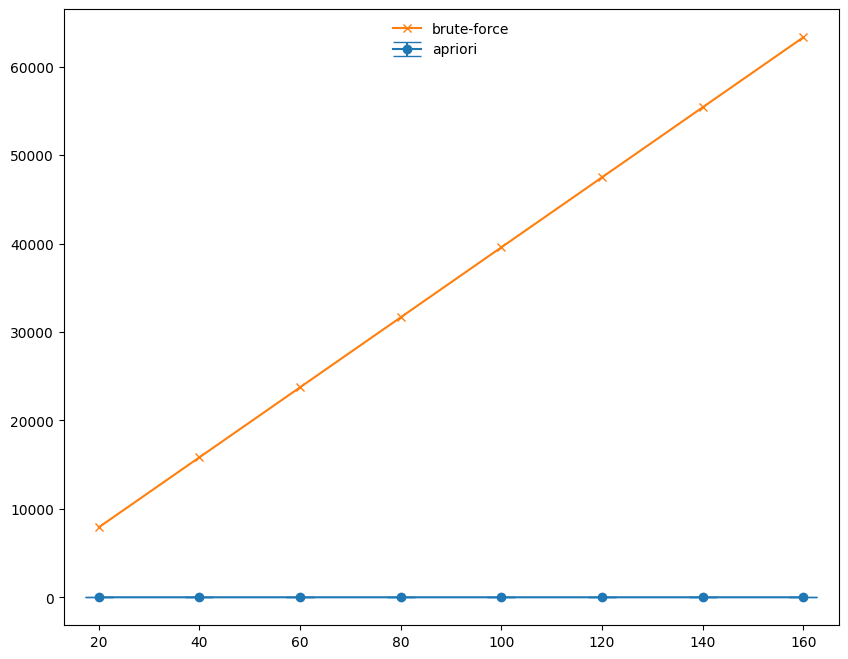

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.errorbar(x=time_apriori.N, y=time_apriori.t_average, yerr=time_apriori.t_yerr, marker="o", capsize=10, label="apriori")
plt.plot(time_est_bf.N, time_est_bf.brute_force, marker="x", label="brute-force")
plt.legend(loc = "upper center", frameon = False)

Text(0.5, 1.0, 'Apriori Line Zoom-In')

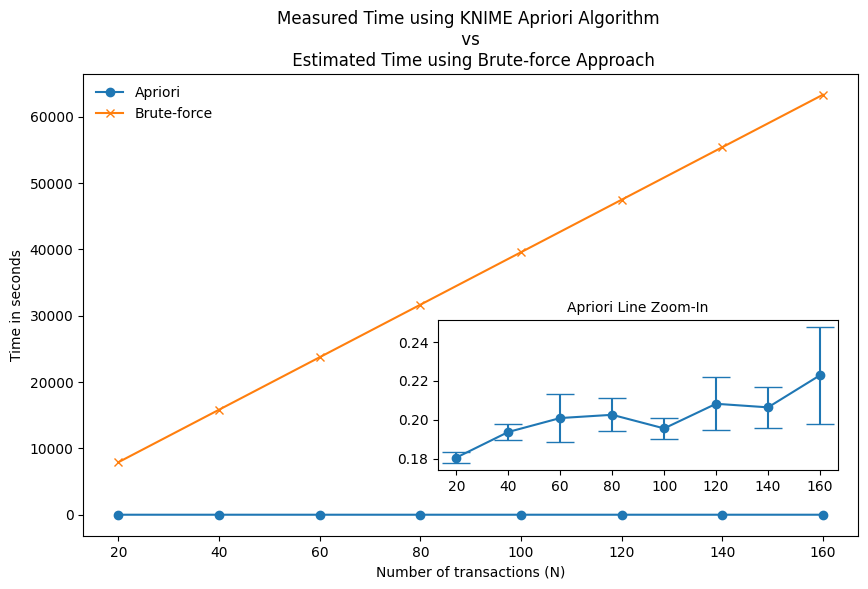

In [100]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time_apriori.N, time_apriori.t_average, marker="o", color="#1f77b4", label="Apriori")
ax.plot(time_est_bf.N, time_est_bf.brute_force, marker="x", color="#ff7f0e", label="Brute-force")
ax.legend(loc = "upper left", frameon = False)
ax.set_ylabel("Time in seconds")
ax.set_xlabel("Number of transactions (N)")
ax.set_title("Measured Time using KNIME Apriori Algorithm \n vs \n Estimated Time using Brute-force Approach", ha="center")
ax_inset = fig.add_axes([0.48, 0.22, 0.40, 0.25])
ax_inset.errorbar(x=time_apriori.N, y=time_apriori.t_average, yerr=time_apriori.t_yerr, marker="o", color="#1f77b4", capsize=10)
ax_inset.set_title("Apriori Line Zoom-In", loc="center", fontsize=10)

# x_ticklabels = time_apriori.N
# ax_inset.set_xticks(range(0,800,100))
# ax_inset.set_xticklabels(x_ticklabels)
